# Seeing stars

## Subject
```
Astronomy, Astrophysics, Astrometry, Astrodynamics, AAAA, 23 points
Back to Scoreboard

Here is the output from a CCD Camera from a star tracker, identify as many stars as you can! (in image reference coordinates) Note: The camera prints pixels in the following order (x,y): (0,0), (1,0), (2,0)... (0,1), (1,1), (2,1)…

Note that top left corner is (0,0)

Ticket
Present this ticket when connecting to the challenge:
ticket{november52005bravo:GCTwRab6ncBxptGtFhtCSUX1l0zgUXBhBu633gxpQf2qIhBNsSC2A3GKG9trwq6fPQ}
Don't share your ticket with other teams.

Connecting
Connect to the challenge on stars.satellitesabove.me:5013 . Using netcat, you might run nc stars.satellitesabove.me 5013

Solving
Your team's flag for this challenge will look something like flag{november52005bravo:___a bunch of unguessable stuff___} .

```

## Solution

In [57]:
%env TERMINFO=/usr/share/terminfo
%env PWNLIB_NOTERM=true
import pwn
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import itertools
plt.rcParams['figure.figsize'] = [1000, 300]
%matplotlib inline

env: TERMINFO=/usr/share/terminfo
env: PWNLIB_NOTERM=true


In [70]:
rem =pwn.remote("stars.satellitesabove.me",5013, timeout=5)
rem.recvuntil("Ticket please:")
rem.send(b"ticket{november52005bravo:GCTwRab6ncBxptGtFhtCSUX1l0zgUXBhBu633gxpQf2qIhBNsSC2A3GKG9trwq6fPQ}\n")
buf = rem.recvuntil("Enter")
buf = buf.decode("latin1")

[x] Opening connection to stars.satellitesabove.me on port 5013
[x] Opening connection to stars.satellitesabove.me on port 5013: Trying 18.219.231.134
[x] Opening connection to stars.satellitesabove.me on port 5013: Trying 3.23.63.90
[x] Opening connection to stars.satellitesabove.me on port 5013: Trying 18.188.120.17
[+] Opening connection to stars.satellitesabove.me on port 5013: Done


In [71]:
a=np.array([[int(x) for x in l.split(",")] for l in buf[:buf.find("Enter")].splitlines() if l])
a

array([[4, 5, 3, ..., 1, 9, 8],
       [5, 1, 7, ..., 1, 2, 6],
       [9, 7, 2, ..., 0, 6, 8],
       ...,
       [8, 3, 7, ..., 5, 3, 0],
       [2, 2, 0, ..., 1, 3, 6],
       [2, 6, 1, ..., 3, 2, 1]])

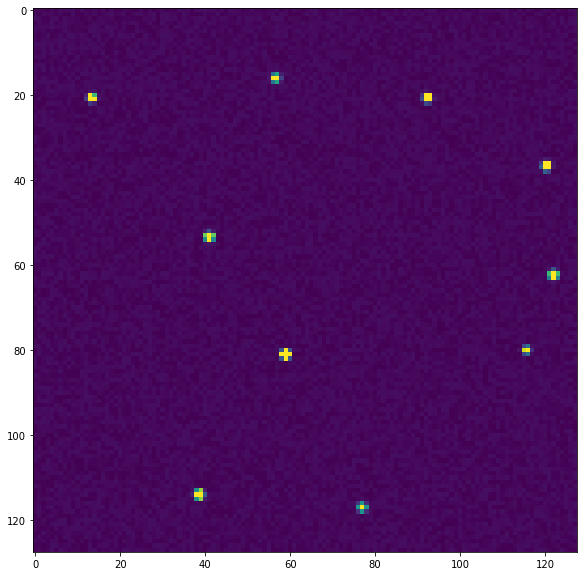

In [72]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(a)

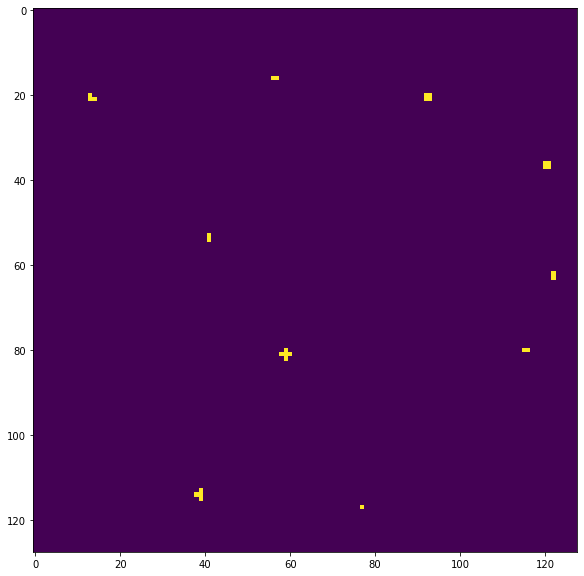

In [73]:
plt.imshow(a > 200)

In [74]:
pts=np.argwhere(a > 200)
pts

array([[ 16,  56],
       [ 16,  57],
       [ 20,  13],
       [ 20,  92],
       [ 20,  93],
       [ 21,  13],
       [ 21,  14],
       [ 21,  92],
       [ 21,  93],
       [ 36, 120],
       [ 36, 121],
       [ 37, 120],
       [ 37, 121],
       [ 53,  41],
       [ 54,  41],
       [ 62, 122],
       [ 63, 122],
       [ 80,  59],
       [ 80, 115],
       [ 80, 116],
       [ 81,  58],
       [ 81,  59],
       [ 81,  60],
       [ 82,  59],
       [113,  39],
       [114,  38],
       [114,  39],
       [115,  39],
       [117,  77]])

In [75]:
clust=sch.fclusterdata(pts,0)
max(clust),clust

(10,
 array([ 2,  2,  1,  3,  3,  1,  1,  3,  3,  4,  4,  4,  4,  8,  8,  5,  5,
         9,  6,  6,  9,  9,  9,  9,  7,  7,  7,  7, 10], dtype=int32))

In [76]:
res=[np.mean(np.array(list(itertools.compress(pts, clust==i))),axis=0) for i in range(1,max(clust)+1)]
res

[array([20.66666667, 13.33333333]),
 array([16. , 56.5]),
 array([20.5, 92.5]),
 array([ 36.5, 120.5]),
 array([ 62.5, 122. ]),
 array([ 80. , 115.5]),
 array([114.  ,  38.75]),
 array([53.5, 41. ]),
 array([81., 59.]),
 array([117.,  77.])]

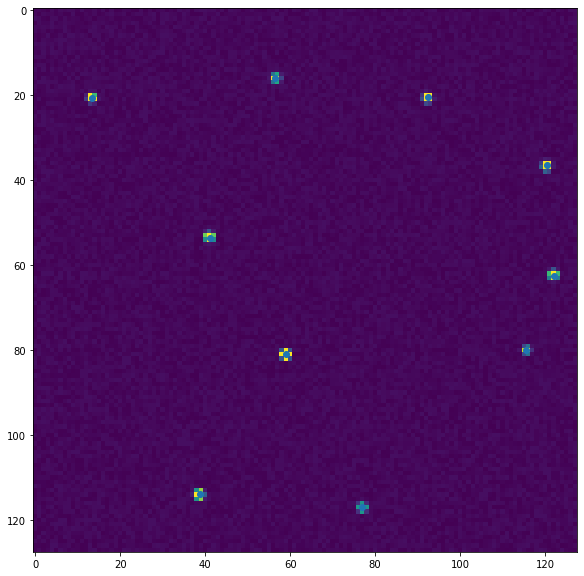

In [77]:
plt.scatter(np.array(res)[:,1],np.array(res)[:,0])
plt.imshow(a)

In [78]:
rem.recv(400)

b" your answers, one 'x,y' pair per line.\n(Finish your list of answers with an empty line)\n"

In [79]:
answer="\n".join("{0},{1}".format(*list(np.round(r).astype(int))) for r in res)
print(answer)

21,13
16,56
20,92
36,120
62,122
80,116
114,39
54,41
81,59
117,77


In [80]:
rem.send(answer)
rem.send("\n\n")

In [81]:
rem.recv()

b'4 Left...\n9,6,6,0,6,7,1,1,3,7,9,7,0,7,6,5,4,6,9,4,3,0,0,5,0,5,1,4,2,2,3,0,2,4,3,0,7,1,3,7,5,9,2,5,3,5,3,1,1,7,4,7,3,8,5,9,8,1,3,4,0,9,4,0,0,2,1,4,1,3,4,5,6,8,5,7,1,4,7,0,2,7,7,5,3,7,0,4,7,6,3,6,6,9,2,0,3,1,6,1,3,7,0,5,2,7,4,7,4,7,3,6,5,0,0,3,7,8,1,1,0,8,0,1,1,3,1,2\n4,8,1,1,4,1,4,9,4,6,7,5,2,5,4,7,3,6,9,1,4,4,1,7,6,5,6,4,5,0,1,4,8,1,0,0,0,2,7,9,6,1,6,0,3,1,2,5,6,3,8,2,3,0,5,9,9,4,6,9,3,7,8,6,6,6,6,2,3,0,8,3,1,5,6,5,4,4,1,3,2,7,6,0,7,4,5,9,8,7,4,4,2,7,0,9,9,0,7,8,2,6,0,3,9,5,1,0,2,2,6,0,4,9,0,2,6,6,5,2,9,2,9,8,3,7,6,8\n2,6,5,6,4,2,0,7,6,4,5,1,9,9,5,0,2,3,5,7,5,6,2,7,3,0,8,4,6,7,1,1,5,0,4,5,2,7,8,3,8,2,1,8,7,0,2,4,6,6,5,5,7,5,3,4,9,1,4,1,4,7,0,5,2,0,4,0,7,7,0,7,7,4,1,3,5,4,0,3,7,9,7,0,3,7,9,1,7,0,0,2,6,0,7,9,7,5,1,4,6,9,6,6,4,7,2,6,8,7,2,4,6,6,4,1,8,5,7,5,6,7,8,4,4,9,9,8\n0,5,2,9,2,6,2,1,1,8,9,4,3,0,5,3,1,8,2,5,4,1,0,4,7,0,8,3,8,6,6,6,2,7,9,5,7,0,7,2,1,1,3,0,9,1,9,9,1,9,8,2,2,7,3,7,1,7,7,3,2,8,0,4,0,5,6,5,6,6,7,7,0,4,2,0,6,1,6,1,4,8,8,5,7,4,3,6,7,1,7,7,2,5,8,0,6,2,2,4,4,9,4,8,5,9,0,0,